In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 35)

# Data preparation

In [2]:
data = pd.read_csv('Telco-Customer-Churn.csv')

## Data preprocessing

### Drop customerID and gender columns as they are irrelevant for the model

In [3]:
data = data.drop(['customerID'], axis=1)
data = data.drop(['gender'], axis=1)
data.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Convert columns with Yes/No values to 1/0

In [4]:
data['Partner'] = data.Partner.eq('Yes').mul(1)
data['Dependents'] = data.Dependents.eq('Yes').mul(1)
data['PhoneService'] = data.PhoneService.eq('Yes').mul(1)
data['MultipleLines'] = data.MultipleLines.eq('Yes').mul(1)
data['OnlineSecurity'] = data.OnlineSecurity.eq('Yes').mul(1)
data['OnlineBackup'] = data.OnlineBackup.eq('Yes').mul(1)
data['DeviceProtection'] = data.DeviceProtection.eq('Yes').mul(1)
data['TechSupport'] = data.TechSupport.eq('Yes').mul(1)
data['StreamingTV'] = data.StreamingTV.eq('Yes').mul(1)
data['StreamingMovies'] = data.StreamingMovies.eq('Yes').mul(1)
data['PaperlessBilling'] = data.PaperlessBilling.eq('Yes').mul(1)
data['Churn'] = data.Churn.eq('Yes').mul(1)

In [5]:
data.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


### One-hot encode InternetService, Contract, PaymentMethod columns

In [6]:
data['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [7]:
data = data.join(pd.get_dummies(data['InternetService']).rename(columns={'No': 'NoInternetService'}))
data = data.drop(['InternetService'], axis=1)
data.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,DSL,Fiber optic,NoInternetService
0,0,1,0,1,0,0,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,True,False,False
1,0,0,0,34,1,0,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0,True,False,False
2,0,0,0,2,1,0,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,True,False,False
3,0,0,0,45,0,0,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,True,False,False
4,0,0,0,2,1,0,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,False,True,False


In [8]:
data['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [9]:
data = data.join(pd.get_dummies(data['Contract']))
data = data.drop(['Contract'], axis=1)

data = data.join(pd.get_dummies(data['PaymentMethod']))
data = data.drop(['PaymentMethod'], axis=1)
data.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,DSL,Fiber optic,NoInternetService,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,True,False,False,True,False,False,False,False,True,False
1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.5,0,True,False,False,False,True,False,False,False,False,True
2,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,True,False,False,True,False,False,False,False,False,True
3,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,True,False,False,False,True,False,True,False,False,False
4,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,False,True,False,True,False,False,False,False,True,False


### Convert TotalCharges column to numeric

In [10]:
data['TotalCharges'] = data['TotalCharges'].replace(' ', 0)
data['TotalCharges'] = data['TotalCharges'].apply(pd.to_numeric)

### Normalize the data

In [11]:
from sklearn.preprocessing import Normalizer

data_to_scale = data[['tenure', 'MonthlyCharges', 'TotalCharges']].copy()

normalizer = Normalizer().fit(data_to_scale)
scaled_data = normalizer.transform(data_to_scale)

data_to_scale['tenure'] = scaled_data[:, 0]
data_to_scale['MonthlyCharges'] = scaled_data[:, 1]
data_to_scale['TotalCharges'] = scaled_data[:, 2]

data_to_scale.head()


,tenure,MonthlyCharges,TotalCharges
0,0.023682,0.706908,0.706908
1,0.017983,0.030122,0.999384
2,0.016552,0.445662,0.895048
3,0.024433,0.022967,0.999438
4,0.011952,0.422512,0.906279


In [12]:
data[['tenure', 'MonthlyCharges', 'TotalCharges']] = data_to_scale[['tenure', 'MonthlyCharges', 'TotalCharges']]
data.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,DSL,Fiber optic,NoInternetService,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0,1,0,0.023682,0,0,0,1,0,0,0,0,1,0.706908,0.706908,0,True,False,False,True,False,False,False,False,True,False
1,0,0,0,0.017983,1,0,1,0,1,0,0,0,0,0.030122,0.999384,0,True,False,False,False,True,False,False,False,False,True
2,0,0,0,0.016552,1,0,1,1,0,0,0,0,1,0.445662,0.895048,1,True,False,False,True,False,False,False,False,False,True
3,0,0,0,0.024433,0,0,1,0,1,1,0,0,0,0.022967,0.999438,0,True,False,False,False,True,False,True,False,False,False
4,0,0,0,0.011952,1,0,0,0,0,0,0,0,1,0.422512,0.906279,1,False,True,False,True,False,False,False,False,True,False


### Data heatmap

<Axes: >

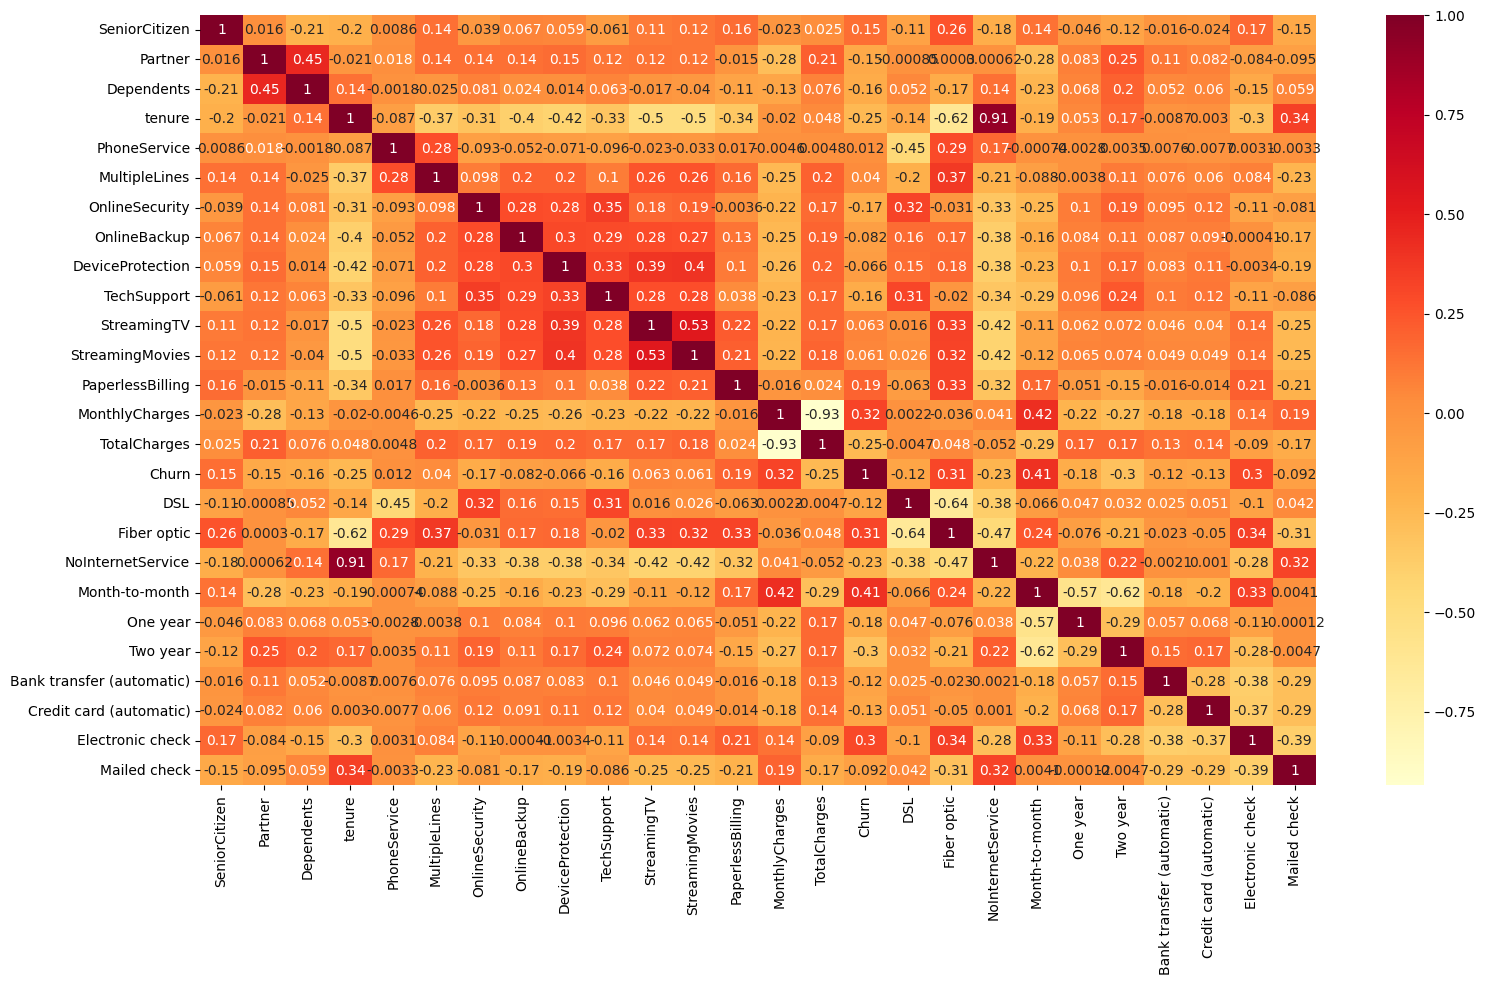

In [13]:
plt.figure(figsize=(18, 10))
sns.heatmap(data.corr(), annot=True, cmap='YlOrRd')

### Splitting the data

In [14]:
X = data.drop(['Churn'], axis=1)
y = data['Churn']

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model building

## Support Vector Machine (SVM) model

### Model training

In [16]:
from sklearn.svm import SVC

svc = SVC(random_state=13)

svc.fit(X_train, y_train)

SVC(random_state=13)

### Model evaluation

In [17]:
svc.score(X_test, y_test)

0.7927608232789212

## Decision Tree model

### Model training

In [18]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=13)

tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=13)

### Model evaluation

In [19]:
tree.score(X_test, y_test)

0.7324343506032647

## Random Forest model

### Model training

In [20]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=13)

forest.fit(X_train, y_train)

RandomForestClassifier(random_state=13)

### Model evaluation

In [21]:
forest.score(X_test, y_test)

0.8090844570617459

## Gradient Boosting model

### Model training

In [22]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boosting = GradientBoostingClassifier(random_state=13)

gradient_boosting.fit(X_train, y_train)

GradientBoostingClassifier(random_state=13)

### Model evaluation

In [23]:
gradient_boosting.score(X_test, y_test)

0.8112136266855926

## XGBoost model

### Model training

In [24]:
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier(random_state=13)

xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=13, ...)

### Model evaluation

In [25]:
xgb_classifier.score(X_test, y_test)

0.8076650106458482

# Hyperparameter tuning the most promising model (Gradeint Boost model)

## Grid search for hyperparameters

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

gradient_boosting = GradientBoostingClassifier(random_state=13)

gb_grid_search = GridSearchCV(estimator=gradient_boosting, param_grid=param_grid, n_jobs=-1, scoring='accuracy')

gb_grid_search.fit(X_test, y_test)

best_gb_model = gb_grid_search.best_estimator_

In [27]:
best_gb_model

GradientBoostingClassifier(n_estimators=50, random_state=13)

## Evaluation of the model with the best hyperparameters

In [28]:
best_gb_model.score(X_test, y_test)

0.8360539389638041

## Confusion matrix of the best model

In [29]:
from sklearn.metrics import confusion_matrix

y_pred = best_gb_model.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[992,  46],
       [185, 186]], dtype=int64)

# Neural Network model

## Prepare the data for the neural network

### Convert the data to torch Custom Dataset

In [30]:
from helpers import CustomDataset

nn_data: CustomDataset = CustomDataset(data)

### Split the data into training and validation sets

In [31]:
from torch.utils.data import random_split

TRAIN_DATA_LEN = int(0.8 * len(nn_data))
TEST_DATA_LEN = int(len(nn_data) - TRAIN_DATA_LEN)

TRAIN_DATA_LEN, TEST_DATA_LEN

train_data, test_data = random_split(nn_data, [TRAIN_DATA_LEN, TEST_DATA_LEN])

### Data loaders

In [32]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=False)

## Neural network model

### Build the model

In [33]:
from net import NeuralNet

IN_FEATURES = len(X.columns)
OUT_FEATURES = 2
model = NeuralNet(IN_FEATURES, OUT_FEATURES)

### Model training

In [34]:
model.fit(train_dataloader, n_epochs=10, lr=0.001)

Epoch: 1/10:
loss: 0.6028870940208435
loss: 0.4857950806617737
loss: 0.4312424659729004
loss: 0.4921228885650635
loss: 0.42240360379219055
loss: 0.440011203289032
loss: 0.34671884775161743
loss: 0.398652046918869
Epoch: 2/10:
loss: 0.3297122120857239
loss: 0.43886417150497437
loss: 0.4850625693798065
loss: 0.42274338006973267
loss: 0.39298155903816223
loss: 0.35760971903800964
loss: 0.5267835855484009
loss: 0.4964713156223297
Epoch: 3/10:
loss: 0.3575421869754791
loss: 0.3824937343597412
loss: 0.4781869351863861
loss: 0.46855273842811584
loss: 0.36940106749534607
loss: 0.4232402443885803
loss: 0.503361165523529
loss: 0.42372098565101624
Epoch: 4/10:
loss: 0.3610030710697174
loss: 0.3903103470802307
loss: 0.31698858737945557
loss: 0.37018710374832153
loss: 0.3896900713443756
loss: 0.3803718686103821
loss: 0.4241197109222412
loss: 0.37817955017089844
Epoch: 5/10:
loss: 0.29356521368026733
loss: 0.35071614384651184
loss: 0.4086361825466156
loss: 0.44345489144325256
loss: 0.436173766851425

### Model evaluation

In [35]:
model.score(test_dataloader)

0.8026969481902059